# Example for Chart Challenge
{Title}<br>{Your name}<br>{The date}

## Instructions for using this template

> Make sure you have copied the template subdirectory and named it with your prompt's date, prompt's name and your name (e.g., `/01_part-to-whole_cnell`) before editing this document!

1. Put all comments either in markdown text (like this) or in the `Python` cells to explain your process to Vizlab reviewers
2. Put all Python code in the Python cells within each section. The sections are organized for you to (in order): do some set-up steps (import packages), load in any data (manually or with built in packages), process your data for plotting, create a plot using matplotlib, and finally compose the final twitter image.
3. You can run individual code chunks while developing code and plots.
4. Make sure to save your output `png` in the `out/` folder, named with the date of the prompt that you've been assigned to, the prompt, and your name (e.g., `20230101_part-to-whole_cnell.png`).
5. When you're happy with the final plot, fill out the supporting information at the bottom and push to gitlab for review. Note: only commit input data if it can't be downloaded directly with code.

## Set up
Import packages here

In [83]:
# Import required packages for data loading/analysis
import geopandas as gpd
from shapely import Point
from shapely.geometry import Polygon
import numpy as np

# Import required packages for plotting and plot composition
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

## Load files

Save any files that you are using directly in the `in` folder. Then read them in to the environment with this chunk of code. Remember, use relative file pathways, and never include any personal computer file pathways.

This is also a good place to load any data from other built-in packages or pulled with an API.

In [2]:
# load in data
gdf = gpd.read_file("in/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp")

## Get data ready for plotting
  
This next section is for doing any pre-processing steps, data joins, etc, to get your data ready for plotting.

In [3]:
# process data
# filter to only include lakes in the US
us_gdf = gdf[gdf["Country"] == "United States of America"]
# calculate circularity of each lake
us_gdf["circularity"] = (4*np.pi*us_gdf["Lake_area"]) / (us_gdf["Shore_len"]**2)

/Users/jhariharan/mambaforge/envs/chartmaking/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
us_gdf.columns

Index(['Hylak_id', 'Lake_name', 'Country', 'Continent', 'Poly_src',
       'Lake_type', 'Grand_id', 'Lake_area', 'Shore_len', 'Shore_dev',
       'Vol_total', 'Vol_res', 'Vol_src', 'Depth_avg', 'Dis_avg', 'Res_time',
       'Elevation', 'Slope_100', 'Wshd_area', 'Pour_long', 'Pour_lat',
       'geometry', 'circularity'],
      dtype='object')

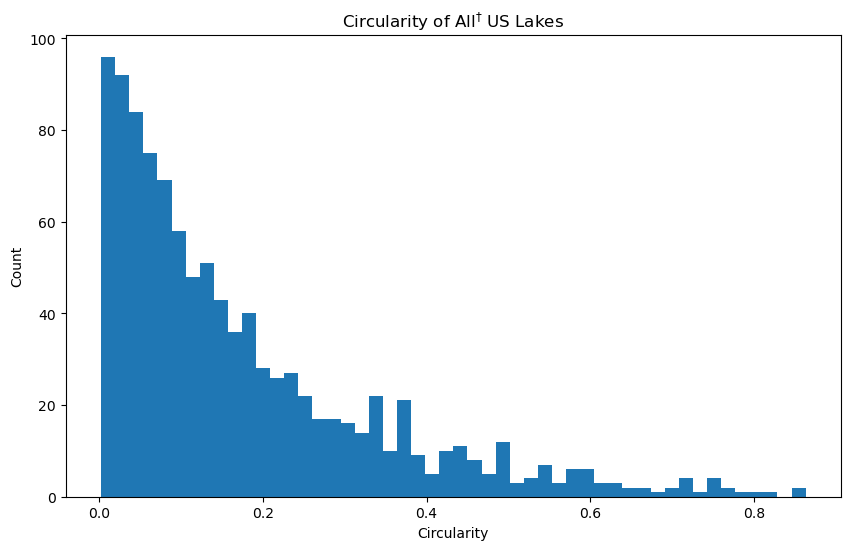

In [49]:
# plot histogram of circularity of US lakes
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(us_gdf["circularity"], bins=50)
ax.set_xlabel("Circularity")
ax.set_ylabel("Count")
ax.set_title("Circularity of All$^{\dagger}$ US Lakes")
plt.show()

In [6]:
# filter out nan lake names
us_gdf = us_gdf[~us_gdf["Lake_name"].isna()]

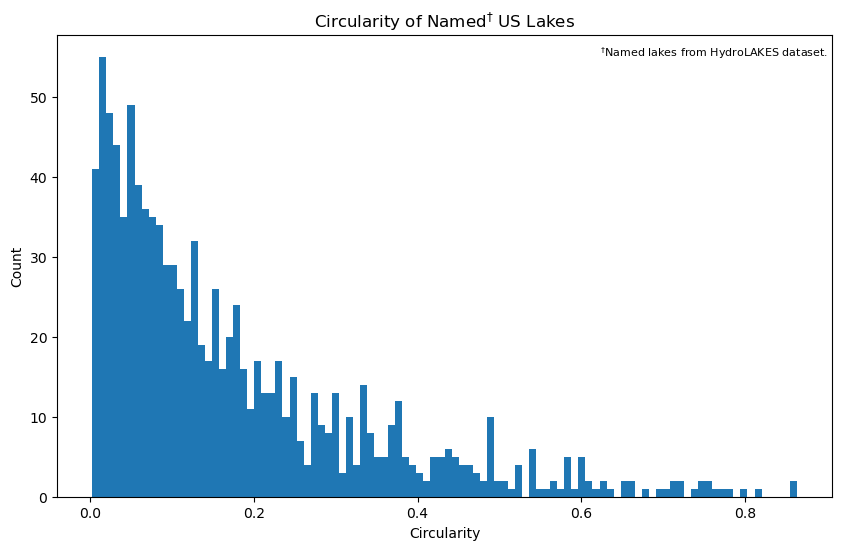

In [60]:
# plot histogram of circularity of US lakes
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(us_gdf["circularity"], bins=100)
ax.set_xlabel("Circularity")
ax.set_ylabel("Count")
ax.set_title("Circularity of Named$^{\dagger}$ US Lakes")
ax.text(0.7, 0.98, "$^{\dagger}$Named lakes from HydroLAKES dataset.",
        transform=ax.transAxes, fontsize=8, verticalalignment='top')
plt.show()

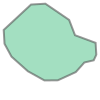

In [8]:
# visualize most circular lake
# get the index of the most circular lake
most_circular_idx = us_gdf["circularity"].idxmax()
# get the geometry of the most circular lake
most_circular_geom = us_gdf.loc[most_circular_idx, "geometry"]
# get the circularity of the most circular lake
most_circular_circ = us_gdf.loc[most_circular_idx, "circularity"]
# get the name of the most circular lake
most_circular_name = us_gdf.loc[most_circular_idx, "Lake_name"]
# plot the lake
most_circular_geom

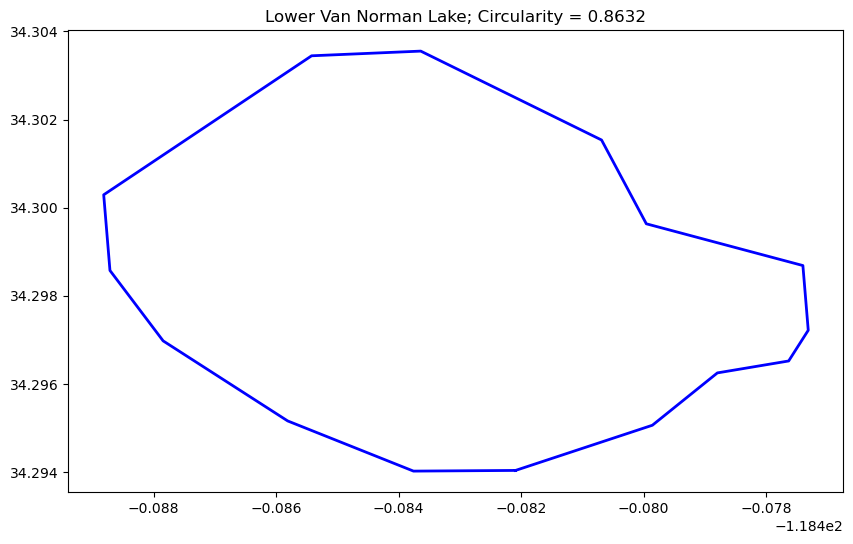

In [47]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = most_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{most_circular_name}" + f"; Circularity = {most_circular_circ:.4f}")
plt.show()

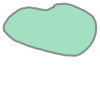

In [10]:
# second most circular lake
# get the index of the second most circular lake
second_most_circular_idx = us_gdf["circularity"].sort_values(ascending=False).index[1]
# get the geometry of the second most circular lake
second_most_circular_geom = us_gdf.loc[second_most_circular_idx, "geometry"]
# get the circularity of the second most circular lake
second_most_circular_circ = us_gdf.loc[second_most_circular_idx, "circularity"]
# get the name of the second most circular lake
second_most_circular_name = us_gdf.loc[second_most_circular_idx, "Lake_name"]
# plot the lake
second_most_circular_geom

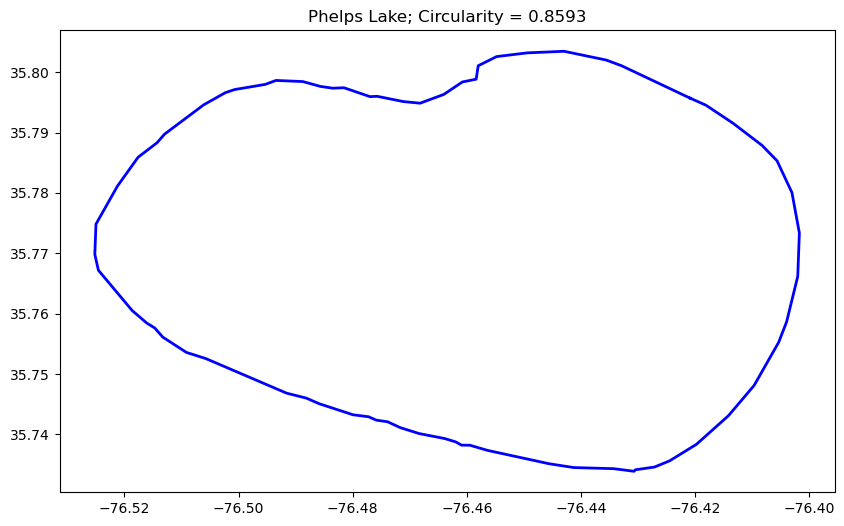

In [46]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = second_most_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{second_most_circular_name}" + f"; Circularity = {second_most_circular_circ:.4f}")
plt.show()

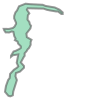

In [63]:
# median circular lake
# get the index of the median circular lake
median_circular_idx = us_gdf["circularity"].sort_values().index[len(us_gdf)//2]
# get the geometry of the median circular lake
median_circular_geom = us_gdf.loc[median_circular_idx, "geometry"]
# get the circularity of the median circular lake
median_circular_circ = us_gdf.loc[median_circular_idx, "circularity"]
# get the name of the median circular lake
median_circular_name = us_gdf.loc[median_circular_idx, "Lake_name"]
# plot the lake
median_circular_geom

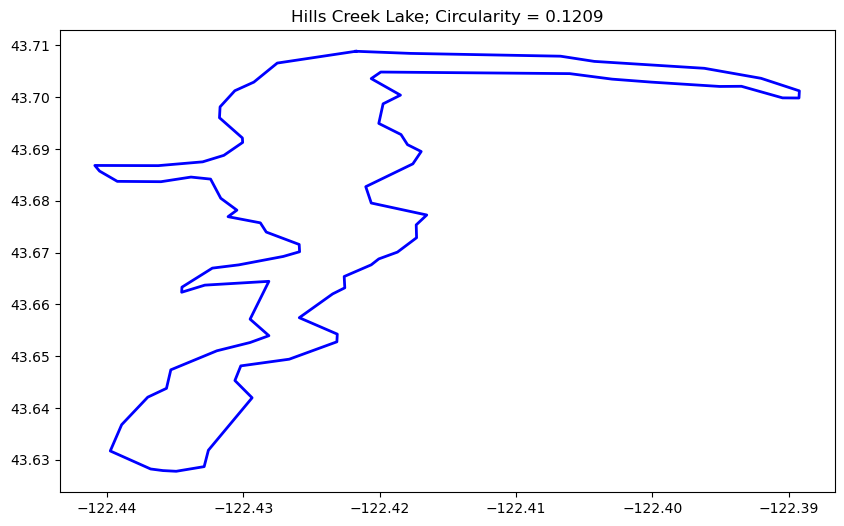

In [64]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = median_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{median_circular_name}" + f"; Circularity = {median_circular_circ:.4f}")
plt.show()

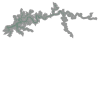

In [12]:
# visualize the least circular lake
# get the index of the least circular lake
least_circular_idx = us_gdf["circularity"].idxmin()
# get the geometry of the least circular lake
least_circular_geom = us_gdf.loc[least_circular_idx, "geometry"]
# get the circularity of the least circular lake
least_circular_circ = us_gdf.loc[least_circular_idx, "circularity"]
# get the name of the least circular lake
least_circular_name = us_gdf.loc[least_circular_idx, "Lake_name"]
# plot the lake
least_circular_geom

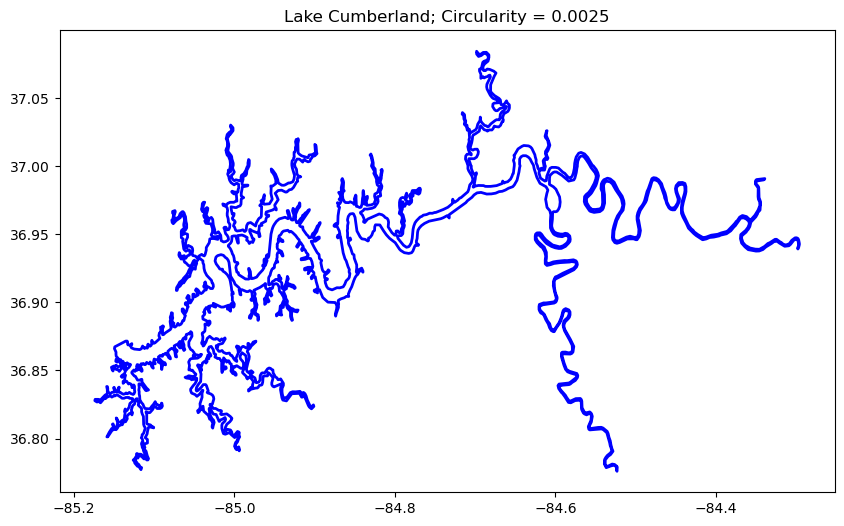

In [44]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = least_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{least_circular_name}" + f"; Circularity = {least_circular_circ:.4f}")
plt.show()

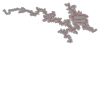

In [14]:
# second least circular lake
# get the index of the second least circular lake
second_least_circular_idx = us_gdf["circularity"].sort_values().index[1]
# get the geometry of the second least circular lake
second_least_circular_geom = us_gdf.loc[second_least_circular_idx, "geometry"]
# get the circularity of the second least circular lake
second_least_circular_circ = us_gdf.loc[second_least_circular_idx, "circularity"]
# get the name of the second least circular lake
second_least_circular_name = us_gdf.loc[second_least_circular_idx, "Lake_name"]
# plot the lake
second_least_circular_geom

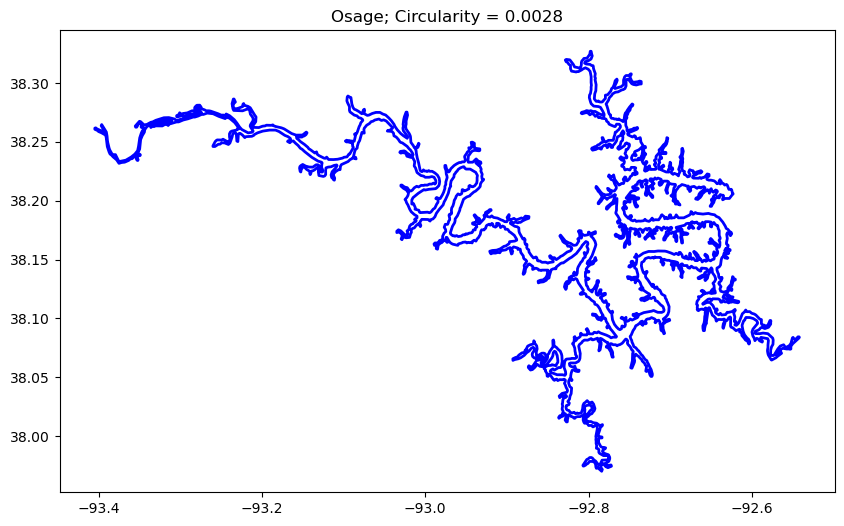

In [45]:
# plot figure
fig, ax = plt.subplots(figsize=(10, 6))
# plot the lake
x, y = second_least_circular_geom.exterior.xy
ax.plot(x, y, color="blue", linewidth=2)
# add the name of the lake
ax.set_title(f"{second_least_circular_name}" + f"; Circularity = {second_least_circular_circ:.4f}")
plt.show()

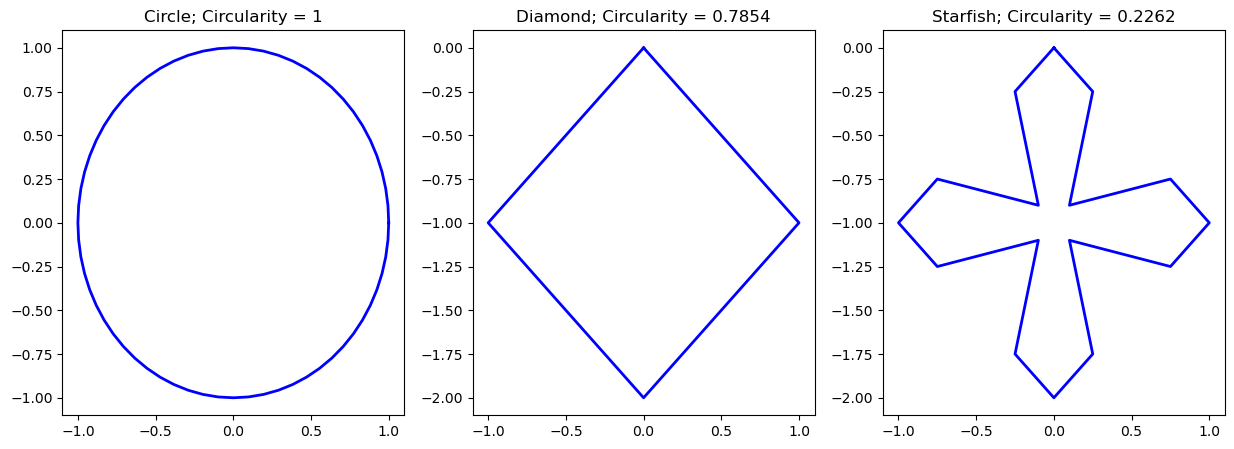

In [122]:
# define the shapes
circle = Point(0, 0).buffer(1)
diamond = Polygon([(0, 0), (0.5, -0.5), (1, -1), (0.5, -1.5), (0, -2), (-0.5, -1.5), (-1, -1), (-0.5, -0.5)])
starfish = Polygon([(0, 0), (0.25, -0.25), (0.1, -0.9), (0.75, -0.75), (1, -1), (0.75, -1.25), (0.1, -1.1), (0.25, -1.75), (0, -2), (-0.25, -1.75), (-0.1, -1.1), (-0.75, -1.25), (-1, -1), (-0.75, -0.75), (-0.1, -0.9), (-0.25, -0.25)])
# plot the shapes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# plot the circle
x, y = circle.exterior.xy
ax[0].plot(x, y, color="blue", linewidth=2)
ax[0].set_title("Circle; Circularity = 1")
# plot the diamond
x, y = diamond.exterior.xy
ax[1].plot(x, y, color="blue", linewidth=2)
diamond_circularity = 4 * np.pi * diamond.area / diamond.length**2
ax[1].set_title(f"Diamond; Circularity = {diamond_circularity:.4f}")
# plot the starfish
x, y = starfish.exterior.xy
ax[2].plot(x, y, color="blue", linewidth=2)
starfish_circularity = 4 * np.pi * starfish.area / starfish.length**2
ax[2].set_title(f"Starfish; Circularity = {starfish_circularity:.4f}")
plt.show()

## Set up main plot

This chunk is where the main `matplotlib` set-up occurs.

#### Figure set-up

In [16]:
# set up figure parameters
plot_width = 16
plot_height = 9
plot_background_color = 'white'

In [17]:
# set up figure
fig = plt.figure(figsize=(plot_width, plot_height), constrained_layout=False) # constrained layout must be False to adjust subplot sizes within grid

<Figure size 1600x900 with 0 Axes>

In [18]:
# set up a grid for the subplots within the figure
# Add a gridspec with 3 rows (title, figure, citation) and set the ratio between the rows
# Here we're only adding 1 column, but if your plot contains subplots
# you could add more columns (or more rows)
# if you add >1 column you need to set the width ratios: e.g, width_ratios = (1,0.5) for 2 columns
# arguments 'left','right','top', and 'bottom' set the extent of the subplots as a fraction 
# of figure width or height. Left cannot be larger than right, and bottom cannot be larger than top.
# wspace and hspace set width and height reserved as spacing between plots, respectively 
# See docs here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec
# See tutorial here: https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html
# You likely will need to tweak 'left' and 'right' to correctly center your plot(s)
# And wspace and hspace to allow room for your axes

# here we're setting the main plot to be 6 tall
main_plot_height = 6
# we'll divide the remaining height between placeholders for the title and for the data source + USGS logo
gs = fig.add_gridspec(3, 1, 
                      height_ratios=((plot_height-main_plot_height)/2, 
                                     main_plot_height, 
                                     (plot_height-main_plot_height)/2),
                      left=0, right=1, bottom=0, top=1,
                      wspace=0.18, hspace=0)

In [19]:
# add placeholders for a figure title (row 0, col 0) and a data source citation (row 2, col 0)
ax_title = fig.add_subplot(gs[0,0])
ax_title.axis('off')
ax_citation = fig.add_subplot(gs[2,0])
ax_citation.axis('off')

(0.0, 1.0, 0.0, 1.0)

#### Figure generation

In [20]:
# Build the main plots (in row 1)
ax_plot = fig.add_subplot(gs[1, 0])
fontsize = 20



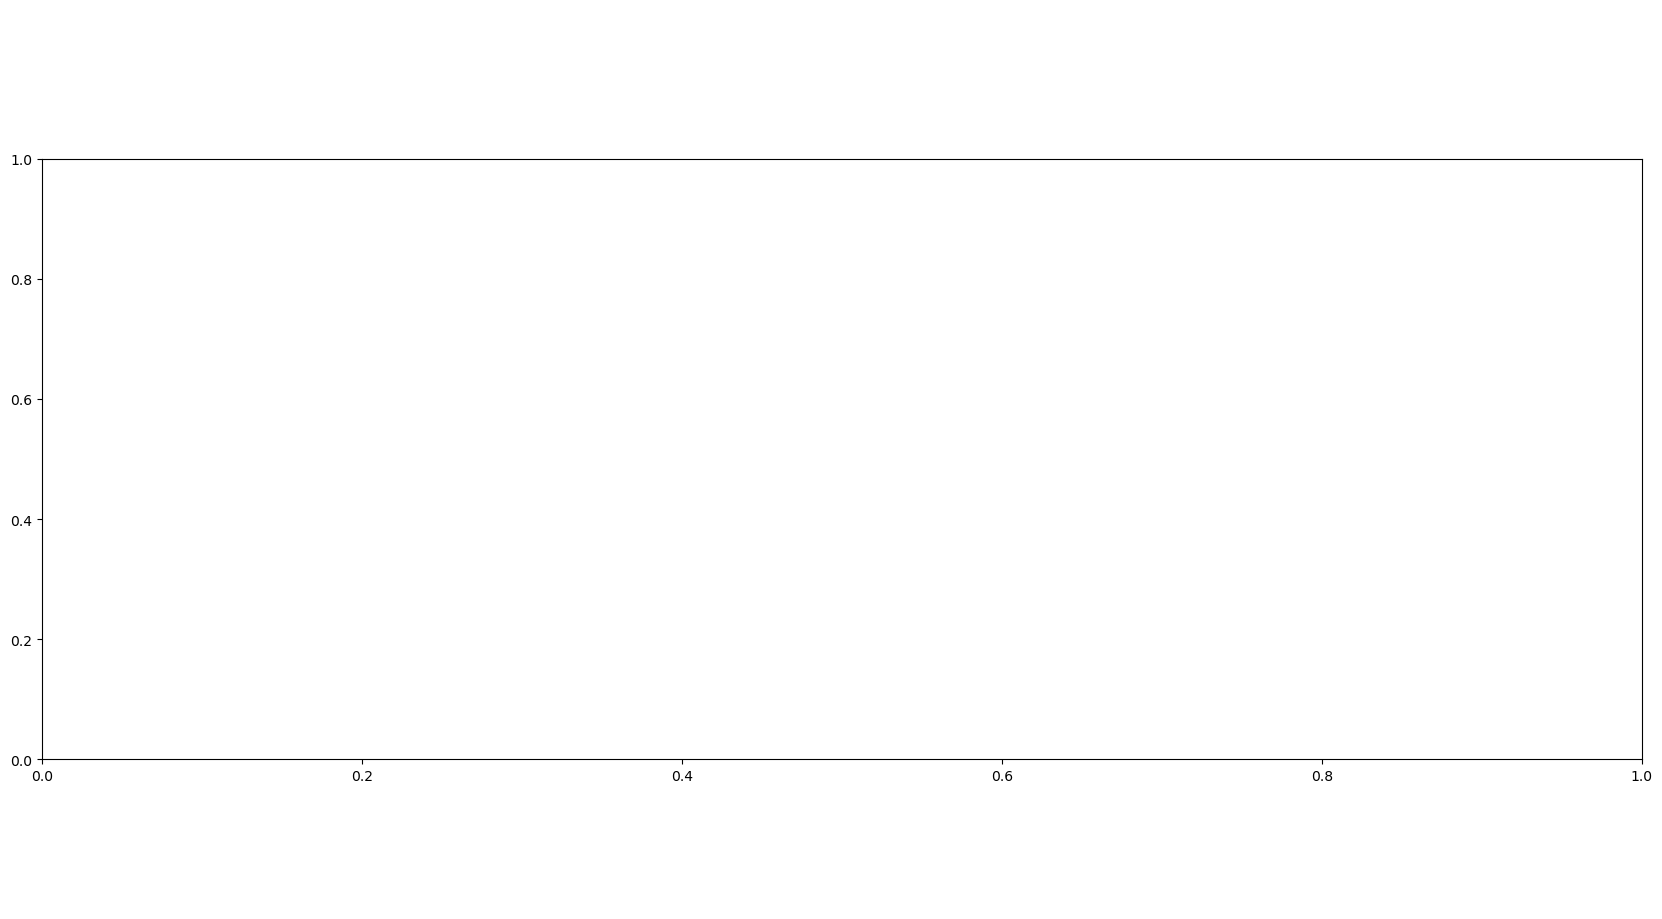

In [21]:
# Check fig - REMBEMBER: only row 1 will have plots, since we've put in blank placeholders for the title and citation
fig

## Produce final plot
Here, add the data source and USGS logo to create the final viz for sharing out on Twitter.

**Make sure to use the format for saving your png with the date of the prompt that you've been assigned to!** (e.g., `20230101_part-to-whole_cnell.png`)

#### Load USGS logo

In [22]:
logo_color = 'black' # 'black' or 'white'
logo = image.imread(f'../usgs_logo_{logo_color}.png')

#### Compose final plot

In [23]:
horizontal_margin = 0.02
vertical_margin = 0.03

##### Add plot title

In [24]:
# add additional axis to hold title
# position = (0,0), width = 100% of figure width (1), height = 100% of figure height (1)
title_ax = fig.add_axes([0, 0, 1, 1], anchor = 'SW', facecolor='none')

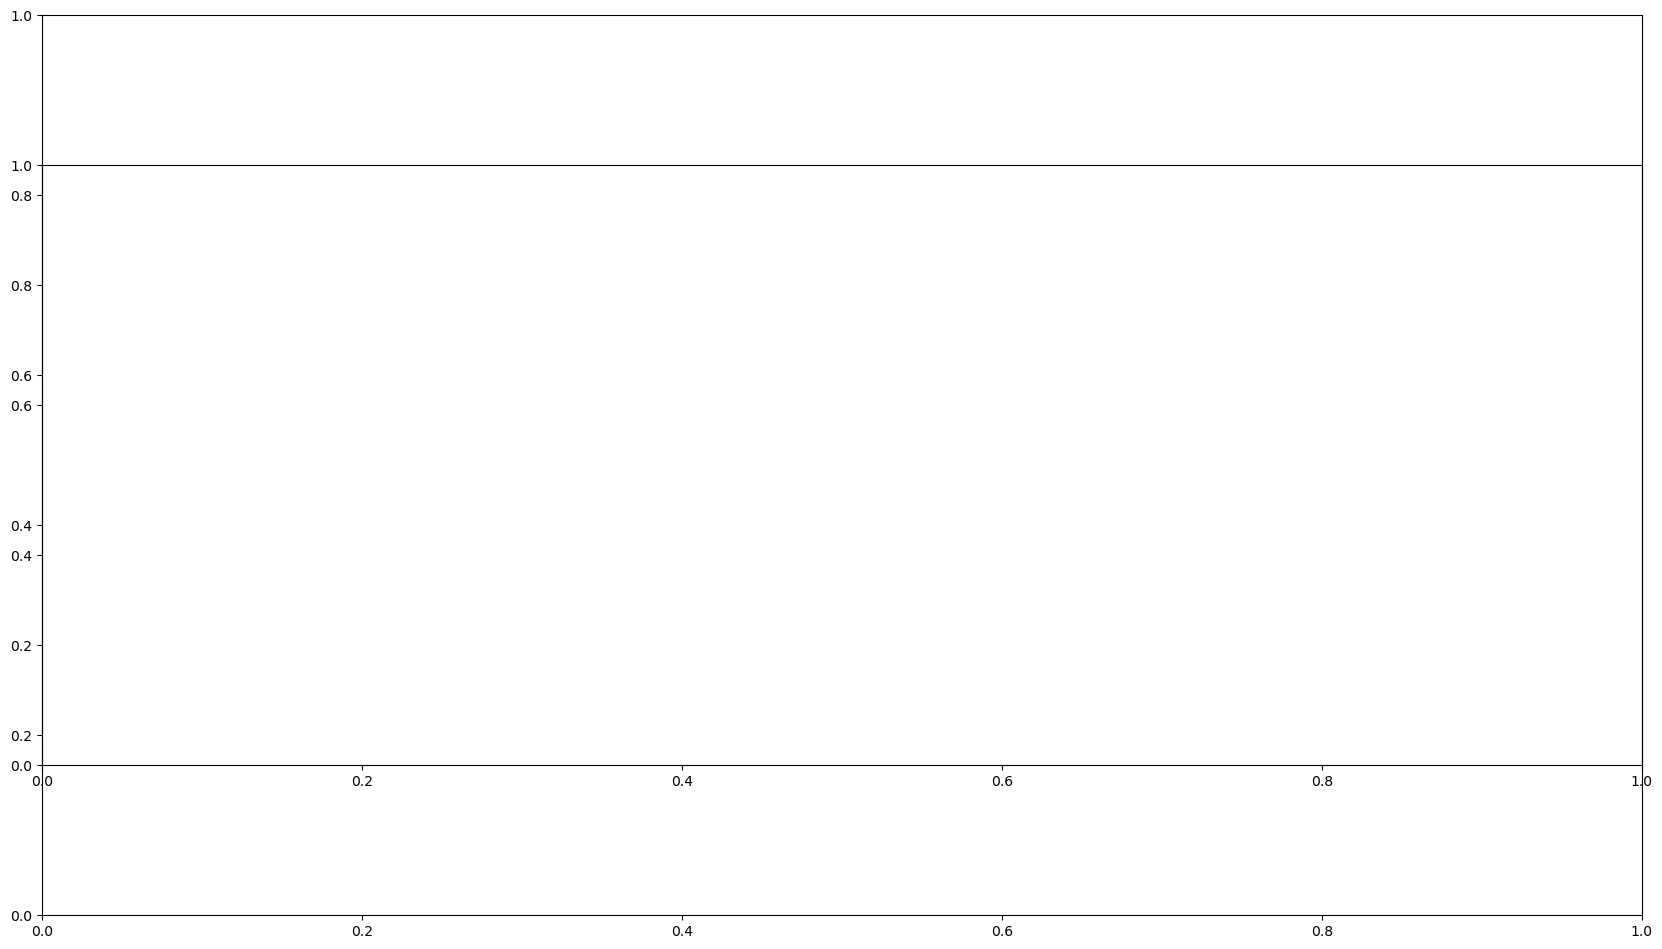

In [25]:
# check axis params
# adjust width and height params for text axis until axis fully covers entire 16:9 plot w/o extending further
fig

In [26]:
# Add title, specifying color, style, and alignment
# see https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html
# for alignment tips
title_ax.text(x = horizontal_margin, y = 0.95, s = 'Chart title', horizontalalignment='left', verticalalignment='top', color = 'black', fontsize=36, fontstyle='normal')
# remove axis lines
title_ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

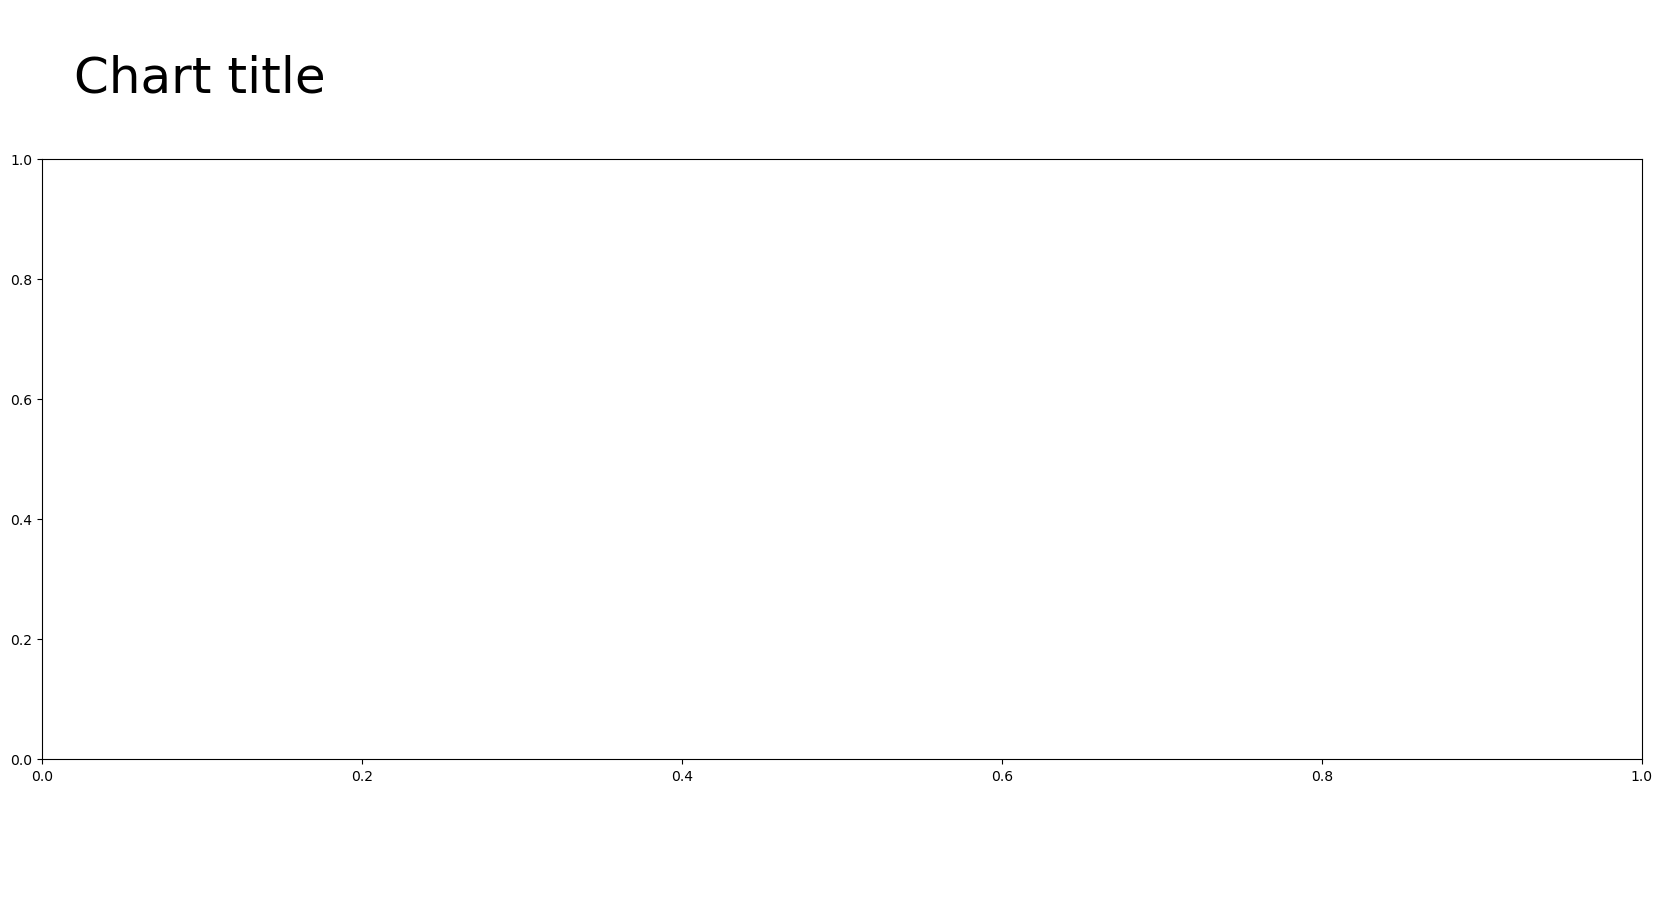

In [27]:
# check placement
fig

##### Add data source

In [28]:
# add additional axis to hold text 
# position = (0,0), width = 100% of figure width (1), height = 100% of figure height (1)
text_ax = fig.add_axes([0, 0, 1, 1], anchor = 'SW', facecolor='none')

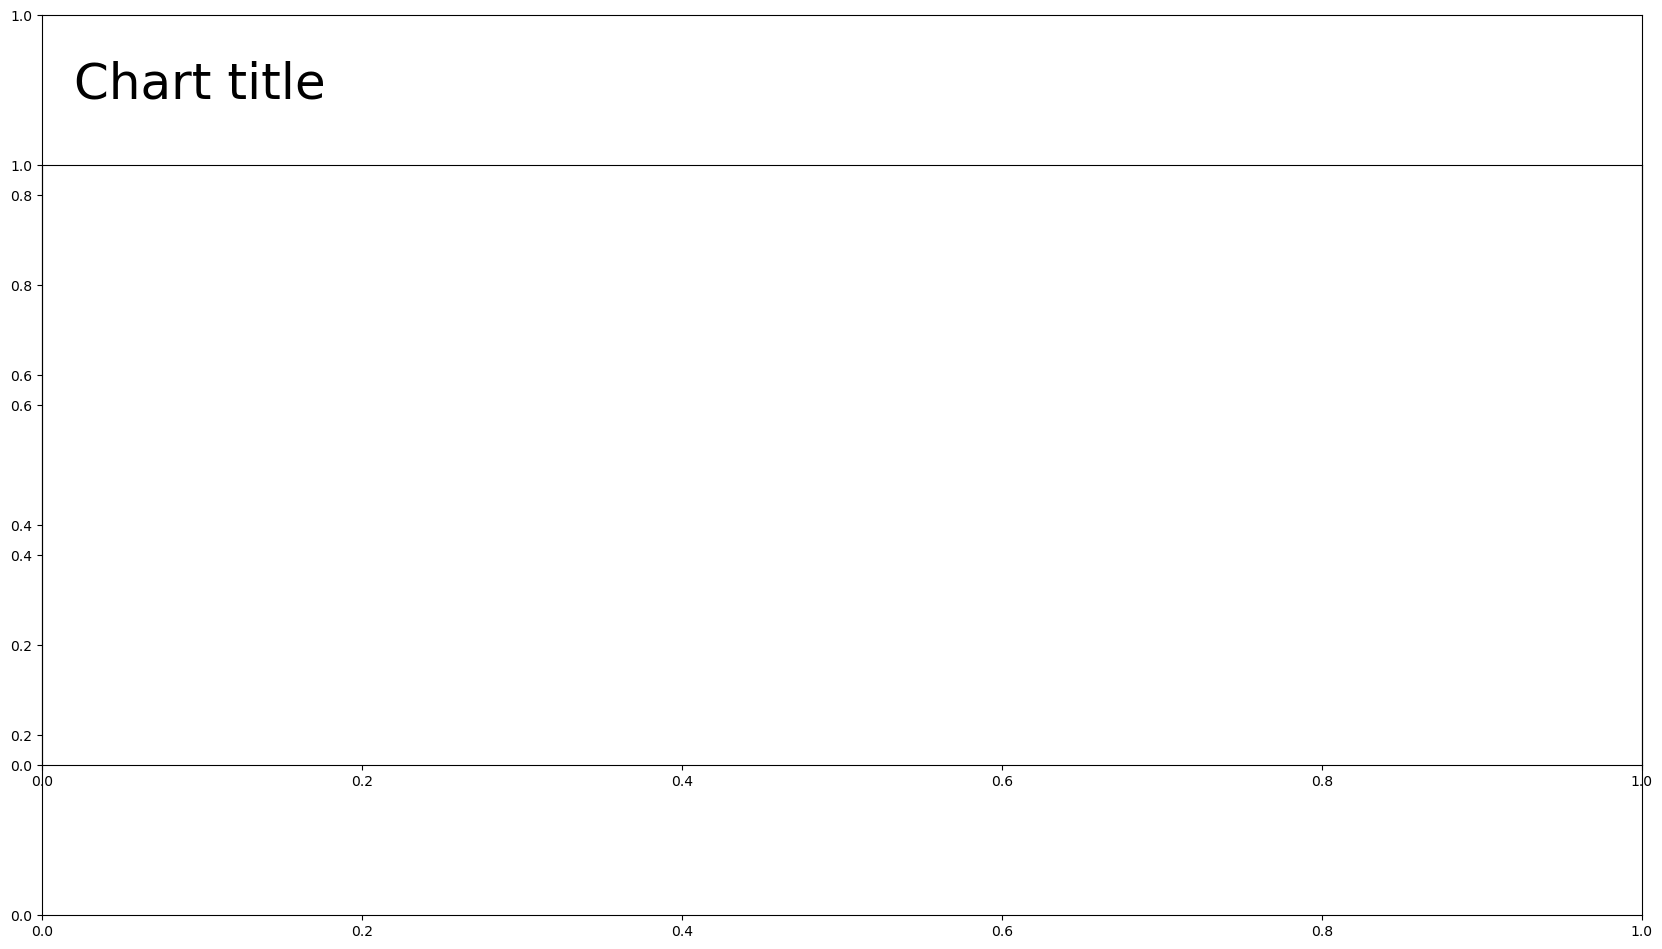

In [29]:
# check axis params
# adjust width and height params for text axis until axis fully covers entire 16:9 plot w/o extending further
fig

In [30]:
# Add text, specifying color, style, and alignment
# see https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html
# for alignment tips
text_ax.text(x = 1-horizontal_margin, y = vertical_margin, s = 'Data Source', horizontalalignment='right', verticalalignment='bottom', color = 'grey', fontsize=12, fontstyle='italic')
# remove axis lines
text_ax.axis('off')

(0.0, 1.0, 0.0, 1.0)

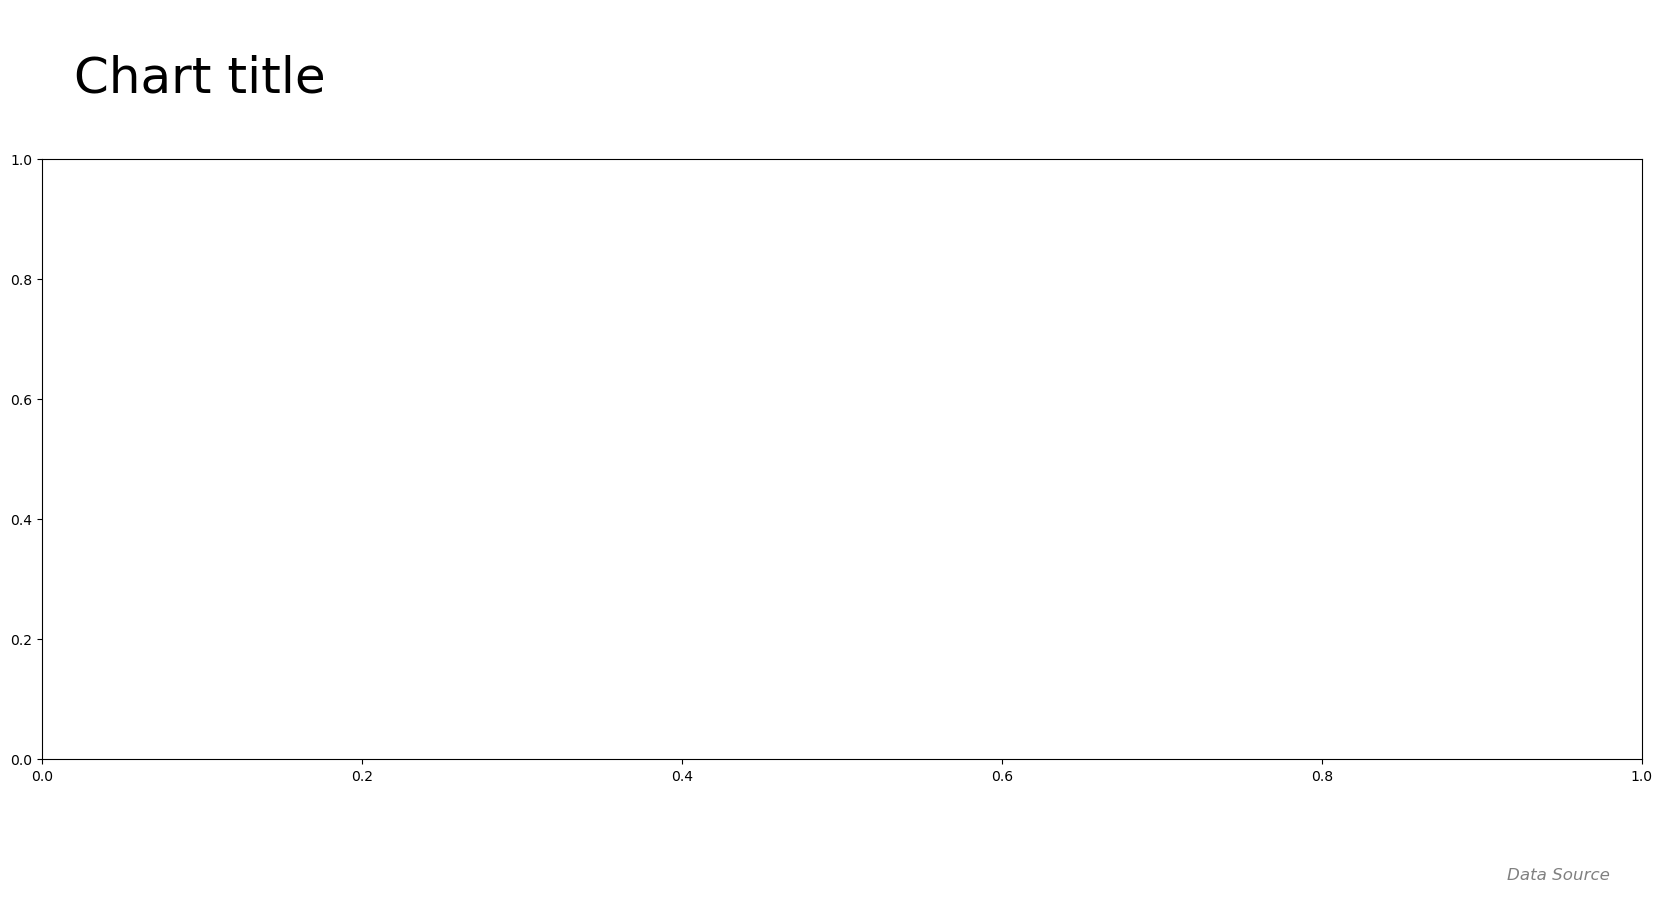

In [31]:
# check placement
fig

##### Add USGS logo

In [32]:
# set width and height fractions for logo
logo_width_fraction = 0.1
logo_height_fraction = 0.1

In [33]:
# add additional axis to hold logo
logo_ax = fig.add_axes([horizontal_margin,vertical_margin, logo_width_fraction, logo_height_fraction], anchor = 'SW', facecolor='none')

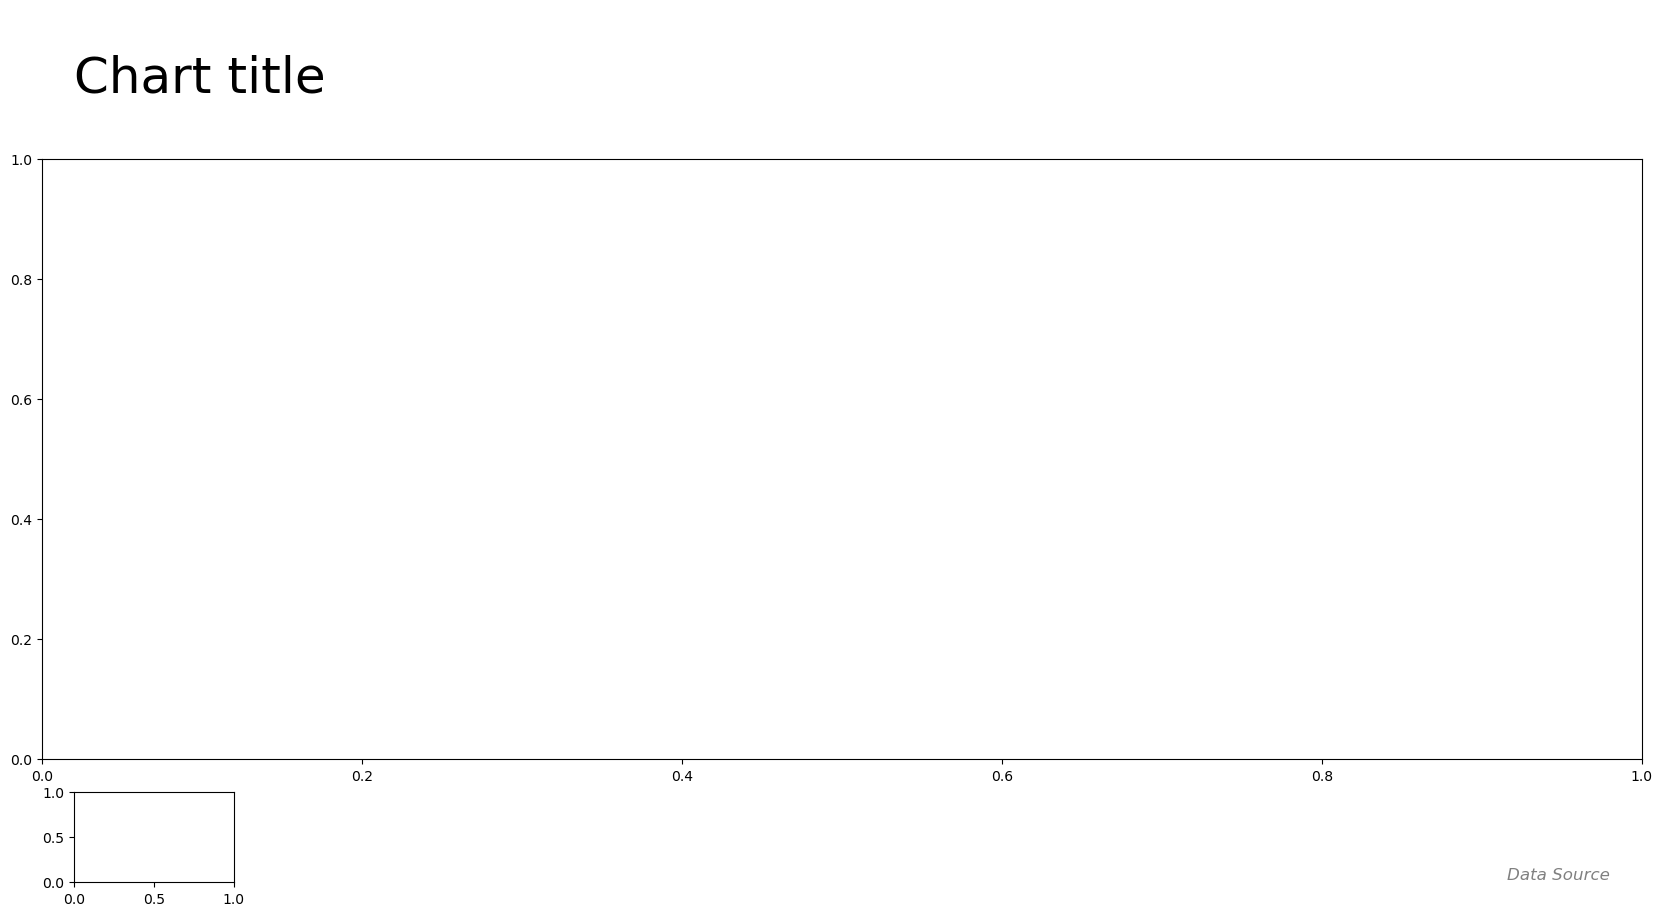

In [34]:
# check axis params
fig

In [35]:
# now add logo to axis, and remove axis lines
logo_ax.imshow(logo)
logo_ax.axis('off')

(-0.5, 2753.5, 1017.5, -0.5)

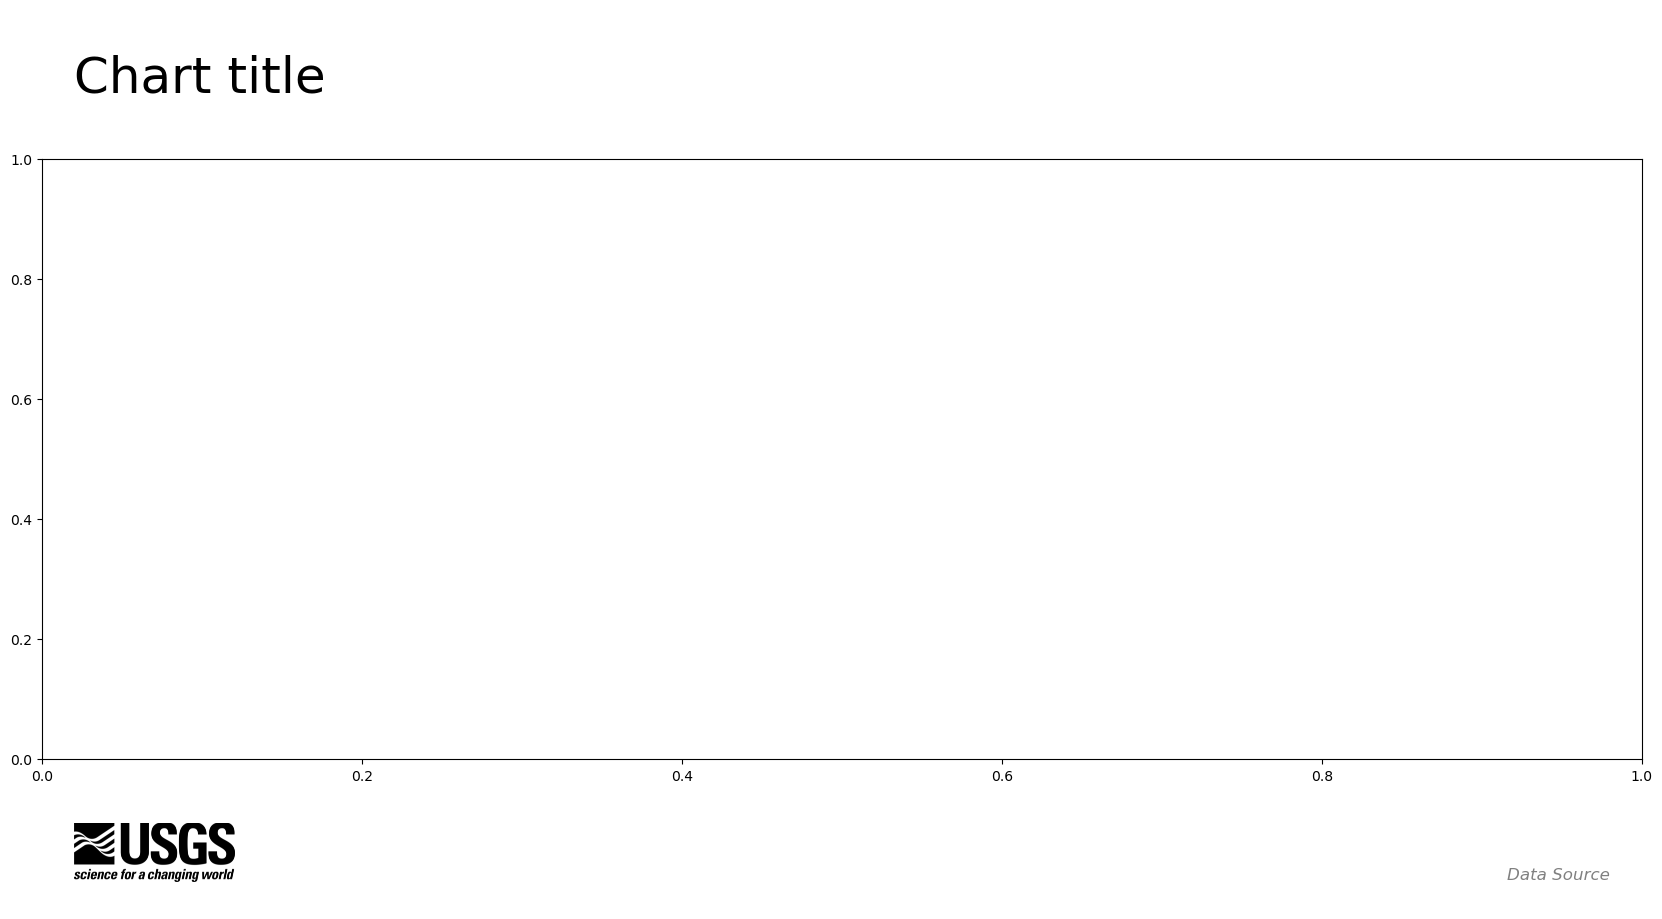

In [36]:
fig

#### Save figure

In [37]:
# Save the final image in Twitter's 16 by 9 format
# !! Use format for saving with the date of your prompt: 
#         YYYYMMDD_prompt_name ()
fig.savefig('out/YYYYMMDD_prompt_name.png', dpi=300, facecolor = plot_background_color)

## Supporting information

### Key takeaways of this viz

1. Key takeaways here

### Data source(s)

Data sources here.